In [1]:
from gurobipy import *
from math import *

In [2]:

"""

Klaučo, M., Blažek, S., Kvasnica, M., & Fikar, M. (2014, June). 
Mixed-integer SOCP formulation of the path planning problem for heterogeneous multi-vehicle systems. 
In 2014 European Control Conference (ECC) (pp. 1474-1479). IEEE.

https://sci-hub.tw/https://doi.org/10.1109/ECC.2014.6862400


"""


q=((0,0),(0,40),(0,50),(1,49),(46,50),(48,48),(46,46),(50,48),(50,35),(30,5),(30,0));
#note:q9 in the tableI is wrong

n = 10


V_h=90
V_c=18

r=0.35

qs=(0,0)
qf=(50,0)

In [3]:
# Create a new model
m = Model("MISOCP_2014")


# Create variables
Tx = {};
Ty = {};
lx = {};
ly = {};
alpha = {};
f = {};
s = {};


#for SOCP
Cx= {};
Cy= {};
C= {};

d= {};

for i in range(1, n+1):
    Tx[i] = m.addVar(vtype = 'C',name='Tx[%s]'%i);
    Ty[i] = m.addVar(vtype = 'C',name='Ty[%s]'%i);
    lx[i] = m.addVar(vtype = 'C',name='lx[%s]'%i);
    ly[i] = m.addVar(vtype = 'C',name='ly[%s]'%i);
    for j in range(i, n+1):
        alpha[i,j] = m.addVar(lb=0,vtype = 'B',name='alpha[%s,%s]'%(i,j));
        f[i,j] = m.addVar(lb=0,vtype = 'C',name='f[%s,%s]'%(i,j));
        s[i,j] = m.addVar(lb=0,vtype = 'C',name='s[%s,%s]'%(i,j));
        d[i,j]=quicksum(sqrt( (q[k][0]-q[k+1][0])*(q[k][0]-q[k+1][0]) + (q[k][1]-q[k+1][1])*(q[k][1]-q[k+1][1]) ) for k in range(i,j));
        


            


        
# Integrate new variables

m.update()




Academic license - for non-commercial use only


In [4]:

# Add constraint: 
M =200
ctr=0;

for i in range(1, n+1):
    for j in range(i,n+1):
        
        #C18
        m.addConstr( f[i,j] - r <= M*(1-alpha[i,j])  ,'C.18.[%s,%s]'%(i,j));
        
        
        
        #C19a
        
        
        ctr=ctr+1;
    
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C19a.[%s,%s]'%(i,j));
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C19a.[%s,%s]'%(i,j));
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C19a.[%s,%s]'%(i,j));
    
    
        m.addConstr( Cx[ctr]  == Tx[i]-lx[j], 'C19ax.1.[%s,%s]'%(i,j)); 
        m.addConstr( Cy[ctr]  == Ty[i]-ly[j], 'C19ay.1.[%s,%s]'%(i,j));
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C19a.2.[%s,%s]'%(i,j));
        m.addConstr( C[ctr]-(V_c*f[i,j])  == M*(1-alpha[i,j]), 'C19a.3.[%s,%s]'%(i,j));
        
    
        
        #C19b
        
        ctr=ctr+1;
        
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C19b.1.[%s,%s]'%(i,j));
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C19b.1.[%s,%s]'%(i,j));
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C19b.1.[%s,%s]'%(i,j));
        
        ctr=ctr+1;
        
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C19b.2.[%s,%s]'%(i,j));
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C19b.2.[%s,%s]'%(i,j));
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C19b.2.[%s,%s]'%(i,j));
        
        
        m.update()
        m.addConstr( Cx[ctr-1]  == Tx[i]-q[i][0], 'C19bx.1.1.[%s,%s]'%(i,j)); 
        m.addConstr( Cy[ctr-1]  == Ty[i]-q[i][1], 'C19by.1.1.[%s,%s]'%(i,j));
        m.addQConstr( Cx[ctr-1]*Cx[ctr-1] + Cy[ctr-1]*Cy[ctr-1] <=  C[ctr-1]*C[ctr-1], 'C19b.2.1.[%s,%s]'%(i,j));
        
        
        m.addConstr( Cx[ctr]  == lx[j]-q[j][0], 'C19bx.1.2.[%s,%s]'%(i,j)); 
        m.addConstr( Cy[ctr]  == ly[j]-q[j][1], 'C19by.1.2.[%s,%s]'%(i,j));
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C19b.2.2.[%s,%s]'%(i,j));
        
       

       
        
        m.addConstr( C[ctr] + d[i,j]+C[ctr-1]-V_h*f[i,j] == M*(1-alpha[i,j]), 'C.19b.3.[%s,%s]'%(i,j));
        
        
     
        
        
for i in range(1, n+1):
    for j in range(i,n):

        #C19c
      
        
        ctr=ctr+1;
        
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C19c.[%s,%s]'%(i,j));
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C19c.[%s,%s]'%(i,j));
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C19c.[%s,%s]'%(i,j));
            
        m.addConstr( Cx[ctr]  == lx[j]-Tx[j+1], 'C19cx.1.[%s,%s]'%(i,j)); 
        m.addConstr( Cy[ctr]  == ly[j]-Ty[j+1], 'C19cy.1.[%s,%s]'%(i,j));
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C19c.2.[%s,%s]'%(i,j));
        m.addConstr( C[ctr]-(V_c*s[i,j])  == M*(1-alpha[i,j]), 'C19c.3.[%s,%s]'%(i,j));
        
        

                 

#C2
for k in range(1, n+1):
    m.addConstr( quicksum(quicksum(alpha[i,j] for j in range(k,n+1)) for i in range(1,k+1))  == 1, 'C2.[%s]'%k); 

    m.addConstr( alpha[k,k]  == 1); 
        


        



In [5]:
###Objective Function
a = m.addVar(lb=0,vtype = 'C',name='a');
b = m.addVar(lb=0,vtype = 'C',name='b');

ctr=ctr+1;
Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='nnn');


m.addConstr( Cx[ctr] == lx[n]-qf[0], 'obj_bx');



m.addQConstr( Tx[1]*Tx[1]+Ty[1]*Ty[1] <= a*a, 'obj_a');
m.addQConstr( Cx[ctr]*Cx[ctr] + ly[n]*ly[n] <= b*b, 'obj_b');


obj = (a+b)/V_c + quicksum(quicksum(f[i,j] for j in range(i,n+1)) for i in range(1,n+1) ) + quicksum(quicksum(s[i,j] for j in range(i,n)) for i in range(1,n+1)) 
m.setObjective(obj,GRB.MINIMIZE)

In [6]:
m.optimize()

Optimize a model with 651 rows, 838 columns and 1902 nonzeros
Model has 212 quadratic constraints
Variable types: 783 continuous, 55 integer (55 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+02]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [6e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 547 rows and 573 columns
Presolve time: 0.02s
Presolved: 104 rows, 265 columns, 301 nonzeros
Variable types: 265 continuous, 0 integer (0 binary)
Presolve time: 0.04s
Presolved: 575 rows, 438 columns, 945 nonzeros
Presolved model has 131 second-order cone constraints
Root barrier log...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.517e+03
 Factor NZ  : 1.134e+04 (roughly 1 MByte of memory)
 Factor Ops : 3.239e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.84080300e+04  8.16

In [7]:

obj = m.getObjective()
print("t_m:",obj.getValue(),"hours\n")
print ('runtime is',m.Runtime,"secs\n")
print("M:",M,"\n")
ctr=0
for i in range(1,n+1):
    for j in range(i,n+1):
        if alpha[i,j].X >0.1:
            ctr=ctr+1
            print("Flyover no.", ctr, "from q",i, " to q",j,":" )
            for k in range(i,j+1):
                print("q", k," : (",q[k][0],", ", q[k][1],")")
            print("\nT", i," : (",Tx[i].X,", ", Ty[i].X,")")
            print("l", j," : (",lx[j].X,", ", ly[j].X,")\n-----")

t_m: 6.416306265258924 hours

runtime is 0.14687013626098633 secs

M: 200 

Flyover no. 1 from q 1  to q 1 :
q 1  : ( 0 ,  40 )

T 1  : ( 6.175223262544328 ,  29.45877451748295 )
l 1  : ( 7.182155343366238 ,  34.26261301419933 )
-----
Flyover no. 2 from q 2  to q 2 :
q 2  : ( 0 ,  50 )

T 2  : ( 7.349452220389921 ,  35.06084923239494 )
l 2  : ( 11.093929522668294 ,  40.127270969324805 )
-----
Flyover no. 3 from q 3  to q 3 :
q 3  : ( 1 ,  49 )

T 3  : ( 11.09396449139643 ,  40.127283068527035 )
l 3  : ( 17.298603355548167 ,  41.21918861880319 )
-----
Flyover no. 4 from q 4  to q 4 :
q 4  : ( 46 ,  50 )

T 4  : ( 29.243605316108486 ,  42.32373691996988 )
l 4  : ( 35.54150212516445 ,  42.16307309836152 )
-----
Flyover no. 5 from q 5  to q 5 :
q 5  : ( 48 ,  48 )

T 5  : ( 35.54151875535874 ,  42.163067550981 )
l 5  : ( 40.05314826963388 ,  39.987992227479296 )
-----
Flyover no. 6 from q 6  to q 6 :
q 6  : ( 46 ,  46 )

T 6  : ( 40.05315730247478 ,  39.987983949242505 )
l 6  : ( 42.371048

t_m: 6.416306265258924 hours



<function matplotlib.pyplot.show(*args, **kw)>

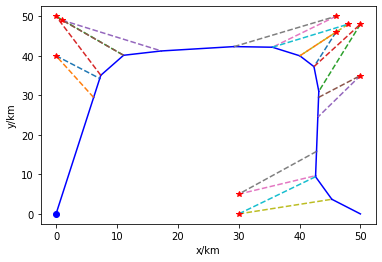

In [16]:
obj = m.getObjective()
print("t_m:",obj.getValue(),"hours\n")
import matplotlib.pyplot as plt
plt.xlabel("x/km")
plt.ylabel("y/km")

plt.plot([Tx[1].X, qs[0]],[Ty[1].X,  qs[1]], color= 'b')
plt.plot([lx[n].X, qf[0]],[ly[n].X,  qf[1]], color= 'b')

for i in range(1,n+1):
    plt.plot([Tx[i].X, lx[i].X],[Ty[i].X,  ly[i].X], color= 'b')
    if i<n:
        plt.plot([Tx[i+1].X, lx[i].X],[Ty[i+1].X,  ly[i].X], color= 'b')


for i in range(1,n+1):
    plt.plot([q[i][0] ,  lx[i].X] ,[q[i][1],  ly[i].X],linestyle= '--')
    plt.plot([Tx[i].X, q[i][0]],[Ty[i].X,  q[i][1]],linestyle= '--')
    plt.plot(q[i][0], q[i][1], marker='*',color='r')

plt.plot(q[0][0], q[0][1], marker='o',color='b')
plt.show

In [9]:
#m.getVars()

In [10]:
#f

In [11]:
#alpha

In [12]:
#m.write("out.lp")

In [13]:
#m.computeIIS()

status = m.status
if status == GRB.Status.OPTIMAL:
    for v in m.getVars():
        print('%s %g' % (v.varName, v.x))
    print('Obj: %g' % m.objVal)
       
elif status == GRB.Status.INFEASIBLE:
    print('Optimization was stopped with status %d' % status)
    # do IIS
    m.computeIIS()
    for c in m.getConstrs():
        if c.IISConstr:
            print('%s' % c.constrName)

In [14]:
#m.write("SOCP_2014.lp")

In [15]:
#m.computeIIS()